<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/jennlee/product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
transaction = pd.read_csv('/content/drive/MyDrive/co_note/project/data/transaction_final.csv')
customer = pd.read_csv('/content/drive/MyDrive/co_note/project/data/customer_final.csv')
product = pd.read_csv('/content/drive/MyDrive/co_note/project/data/product_final.csv')

In [16]:
print(transaction.shape, customer.shape, product.shape)

(1254578, 14) (99999, 7) (44424, 10)


In [17]:
display(transaction.columns, customer.columns, product.columns)

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'total_amount', 'product_id', 'quantity', 'item_price',
       'with_promo'],
      dtype='object')

Index(['customer_id', 'gender', 'birthdate', 'home_location',
       'first_join_date', 'age_join', 'age_now'],
      dtype='object')

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'usage', 'productDisplayName', 'brand'],
      dtype='object')

In [18]:
product.season.unique()

array(['Fall', 'Summer', 'Winter', 'Spring', nan], dtype=object)

In [21]:
product.head()

,product_id,gender,masterCategory,subCategory,articleType,baseColour,productDisplayName,brand
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Turtle Check Men Navy Blue Shirt,turtle
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Peter England Men Party Blue Jeans,peter
2,59263,Women,Accessories,Watches,Watches,Silver,Titan Women Silver Watch,titan
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Manchester United Men Solid Black Track Pants,manchester
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Puma Men Grey T-shirt,puma


In [22]:
product.rename(columns={'id':'product_id'}, inplace=True)
product.drop(columns = {'season', 'usage'}, inplace=True)
product.rename(columns={'gender':'product_gender'}, inplace=True)

In [23]:
customer.rename(columns={'gender':'customer_gender'}, inplace=True)

In [27]:
transaction.payment_status.value_counts()

1    1201028
0      53550
Name: payment_status, dtype: int64

In [29]:
transaction = transaction[transaction.payment_status == 1]

## Female vs Male
female 고객이 male 고객에 비해 약 1.8배 많은데, male 제품에 대한 sales 와 구매 횟수가 많다는 것은 female 고객을 잡지 못하고 있다는 의미가 될 수 있다.
1. male 고객과 female 고객이 성별에 맞는 물품을 구매했는지 확인

In [32]:
# 필요한 데이터
# transaction: 'created_at', 'customer_id', 'booking_id', 'product_id'
# customer: 'customer_id', 'customer_gender', 'home_location', 'age_now'
# product: 'product_id', 'product_gender', 'masterCategory', 'subCategory', 'articleType'

# print(tranx.shape, cust.shape, prod.shape)
# (1201028, 14) (99999, 7) (44424, 8)

tranx = transaction[['created_at', 'customer_id', 'booking_id', 'product_id']]
cust = customer[['customer_id', 'customer_gender', 'home_location', 'age_now']]
prod = product[['product_id', 'product_gender', 'masterCategory', 'subCategory', 'articleType']]

In [33]:
print(tranx.shape, cust.shape, prod.shape)

(1201028, 4) (99999, 4) (44424, 5)


In [34]:
# merged = [['customer_id', 'customer_gender', 'product_gender', 'product_id']]

merged = pd.merge(tranx, cust, on='customer_id', how='left')
merged = pd.merge(merged, prod, on='product_id', how='left')

# Select the desired columns
merged = merged[['customer_id', 'customer_gender', 'product_gender', 'product_id']]

# Verify the shape
print(merged.shape)

(1201028, 4)


In [37]:
merged.customer_gender.value_counts()

F    766036
M    434992
Name: customer_gender, dtype: int64

In [38]:
merged.product_gender.value_counts()

Men       598390
Women     504095
Unisex     57911
Boys       22561
Girls      17480
Name: product_gender, dtype: int64

In [41]:
uni = merged[merged.product_gender == 'Unisex']
uni.customer_gender.value_counts()

F    36903
M    21008
Name: customer_gender, dtype: int64

In [43]:
# Unisex는 성별 판단할수 없고 Boys & Girls는 본인이 직접 사는 경우가 드물다고 생각 (보통은 엄마가 사주지 않나)
# The Children's Apparel market covers apparel for boys and girls up to age 14. (https://www.statista.com/outlook/cmo/apparel/children-s-apparel/indonesia#sales-channels)
gender_filter = merged[(merged['product_gender'] == 'Men') | (merged['product_gender'] == 'Women')]
gender_filter.shape

(1102485, 4)

In [44]:
gender_filter.head()

,customer_id,customer_gender,product_gender,product_id
0,5868,F,Men,54728
1,4774,F,Men,16193
2,4774,F,Women,53686
3,4774,F,Women,20228
4,4774,F,Women,55220


In [47]:
gender_filter['product_gender'] = gender_filter['product_gender'].replace({'Women': 'F', 'Men': 'M'})
gender_filter.info()

<ipython-input-47-189ccdee2c16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_filter['product_gender'] = gender_filter['product_gender'].replace({'Women': 'F', 'Men': 'M'})


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102485 entries, 0 to 1201027
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   customer_id      1102485 non-null  int64 
 1   customer_gender  1102485 non-null  object
 2   product_gender   1102485 non-null  object
 3   product_id       1102485 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 42.1+ MB


In [49]:
print(gender_filter.customer_gender.value_counts())
print(gender_filter.product_gender.value_counts())

F    703238
M    399247
Name: customer_gender, dtype: int64
M    598390
F    504095
Name: product_gender, dtype: int64


In [50]:
gender_filter[(gender_filter.customer_gender == 'F') & (gender_filter.product_gender == 'M')]

,customer_id,customer_gender,product_gender,product_id
0,5868,F,M,54728
1,4774,F,M,16193
7,4774,F,M,14142
8,4774,F,M,12282
10,4774,F,M,46352
...,...,...,...,...
1201018,99675,F,M,15331
1201022,77554,F,M,28377
1201024,34829,F,M,19394
1201025,99645,F,M,13079


In [51]:
gender_filter[(gender_filter.customer_gender == 'M') & (gender_filter.product_gender == 'F')]

,customer_id,customer_gender,product_gender,product_id
44,58191,M,F,51799
45,58191,M,F,37056
46,58191,M,F,49520
47,58191,M,F,6889
50,58191,M,F,52906
...,...,...,...,...
1200994,37956,M,F,54587
1200997,12282,M,F,39136
1200998,12282,M,F,49616
1201020,16528,M,F,20764


In [54]:
print(f'M중에 F제품 산 경우: {182361/399247}')
print(f'F중에 M제품 산 경우: {381504/703238}')

M중에 F제품 산 경우: 0.4567623551335389
F중에 M제품 산 경우: 0.5424962814864953


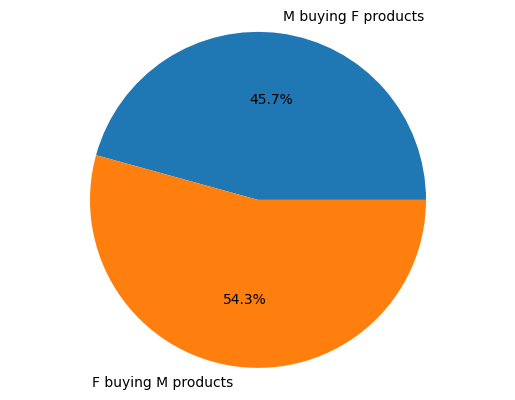

In [59]:
labels = ['M buying F products', 'F buying M products']
values = [182361/399247, 381504/703238]

# Plot
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()